####  2.1 분류 classification 와 회귀 regressioin
- 분류 1)이진분류 binary classification 2) 다중 분류 multiclass cllasification  
 1) binary classification - positive / negative - 두 개 클래스를 지칭하는 말이지 좋고 나쁘고를 뜻하지 않음

- 회귀 - 연속성이 있는 데이터(연소득예측)를 예측

#### 2.2 일반화, 과대적합, 과소적합
- 일반화 generalization -모델이 처음보는 데이터를 정확하게 예측할 수 있으면 훈련세트에서 테스트 세트로 '일반화'되었다고 한다.
- 과대적합 overfitting - 너무 복잡해서 모델을 만들어서 훈련세트 샘플에 너무 가깝게 맞춰져있어서 일반화 되기 어려운 경우.
- 과소적합 underfitting - 너무 간단한 모델을 만들어서 데이터의 다양성을 잡아내지 못하는 경우

#### 지도 학습 알고리즘

In [93]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### 데이터 셋 종류

#### 1) forge 데이터셋

X.shape: (26, 2)


C:\Users\A\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


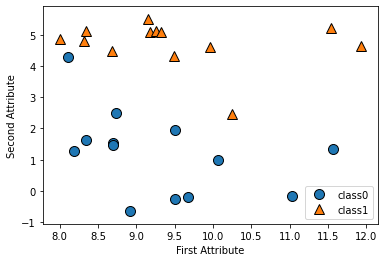

In [94]:
# forge dataset- 인위적으로 만든 이진분류 데이터셋
# x축 = 첫 번째특성 ,y축= 두 번째 특성
X,y = mglearn.datasets.make_forge() # 데이터셋 만듦

# 산점도 표시
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["class0","class1"], loc=4)
plt.xlabel("First Attribute")
plt.ylabel("Second Attribute")
print("X.shape:",X.shape) # 26개 데이터 포인트와 2개 특성
plt.show()

#### 2) wave 데이터셋
- 입력특성 하나와 모델링할 타깃 변수 가짐

Text(0, 0.5, 'target')

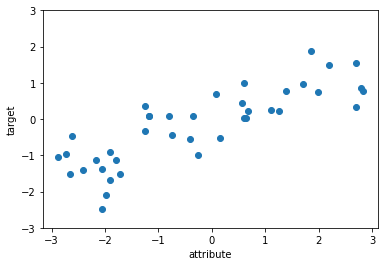

In [95]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("attribute")
plt.ylabel("target")

#### 3) 유방암 데이터
- 양성 benign 
- 음성 malignant
- 딕셔너리는 cancer['data'] 이렇게 찾고, 점 표기법은 cancer.data 이렇게 찾는다?

In [96]:
import numpy as np

In [97]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n",cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [98]:
print("유방암 데이터 형태",cancer.data.shape) # 569개 데이터 포인트, 30개 특성
print("클래스별 샘플 개수:\n", 
      {n:v for n,v in zip(cancer.target_names, np.bincount(cancer['target']))})

유방암 데이터 형태 (569, 30)
클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [99]:
print("특성이름:",cancer.feature_names)

특성이름: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### 4) 보스턴 주택가격 데이터 Bostion Housing

In [100]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


In [101]:
# 특성공학 - 위의 13개의 데이터 특성 끼리 서로 곱하여 특성 개수를 확장하는 것
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:",X.shape)# 13개의 원래 특성에 13개에서 2개씩 

X.shape: (506, 104)


### k-최근접 이웃
- 이웃이 1개가 아닌 임의의 k개의 이웃을 선택해서 이웃 선택가능
- 테스트포인트 1개에 대해 클래스0에 속한 이웃이 몇 개인지, 클래스1에 속한 이웃이
- 몇 개인지 세서 이웃이 더 많은 클래스를 레이블로 지정
- 즉 k개의 최근접 이웃 중 다수의 클래스가 레이블이 됨

C:\Users\A\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


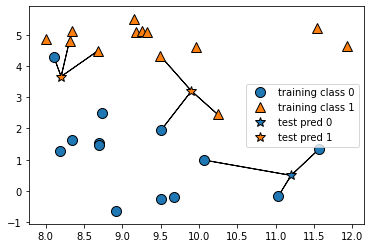

In [102]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

#### k-최근접 이웃 알고리즘 적용

In [103]:
# 훈련 데이터 분리
from sklearn.model_selection import train_test_split
X, y= mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

C:\Users\A\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [104]:
# 분류 모델 불러옴
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

# 학습 fit
clf.fit(X_train,y_train)

# 예측 predict
print("테스트 세트 예측:", clf.predict(X_test)) # 각 데이터 포인트에 대해 가까운이웃 계산 후 가장 많은 클래스 찾음

# 평가 score 
print("테스트 세트 정확도 :{:.2f}".format(clf.score(X_test,y_test)))
print(clf.score(X_test,y_test))




테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정확도 :0.86
0.8571428571428571


#### KNeighborsClassifier 분석

- 이웃 수에 따라 결정경계 decision boundary가 어떻게 달라지는지 확인

C:\Users\A\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\A\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


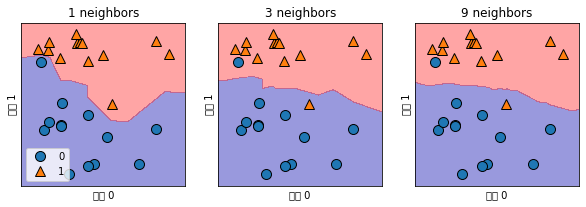

In [114]:
fig, axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    #fit 메소드는 self 오브젝트를 리턴하기 때문에 객체 생성과 fit 메소드 한번에씀
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
   
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)


- 유방암 데이터셋에 적용

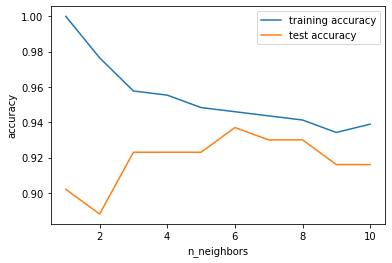

In [118]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]
# 1에서 10까지 n_neighbors 적용
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()